In [208]:
import matplotlib.pylab as plt
import numpy as np
import os
import sys
from pathlib import Path
from hdf5storage import loadmat
from scipy import signal

In [209]:
dataset_path = '/home/zhang/zxc/STFT_3DDL/DATASETS/raw_data/DAS1K/'

In [210]:
def get_class_names(directory_path):
    # 转换为Path对象
    directory = Path(directory_path)
    # 确保路径存在且为目录
    if not directory.is_dir():
        raise ValueError(f"{directory_path} 不是一个有效的目录路径")
    
    # 创建一个集合来存储类别名，避免重复
    category_names = set()
    
    # 遍历主文件夹下的所有子文件夹
    for subfolder in directory.iterdir():
        if subfolder.is_dir():  # 检查是否为子文件夹
            # 遍历子文件夹中的文件
            category_names.add(subfolder.stem)
    
    # 返回类别名列表
    return list(category_names)

class_names = get_class_names(dataset_path)
class_names_0 = 'HANDHAMMER'
class_names_1 = 'DRILLING'
# class_names_1 = 'CARHORN'

print(class_names)

['HANDHAMMER', 'HANDSAW', 'FOOTSTEPS', 'WELDING', 'SHOVELING', 'CARHORN', 'DRILLING', 'THUNDERSTORM', 'RAIN', 'JACKHAMMER']


In [211]:
def get_iterfile_names(directory_path):
    # 转换为Path对象
    directory = Path(directory_path)
    # 确保路径存在且为目录
    if not directory.is_dir():
        raise ValueError(f"{directory_path} 不是一个有效的目录路径")
    
    # 创建一个集合来存储文件名，避免重复
    file_names = set()
    
    # 遍历主文件夹下的所有子文件夹
    for subfolder in directory.iterdir():
        if subfolder.is_file():  # 检查是否为子文件
            file_names.add(subfolder.stem)
    
    # 返回文件名列表
    return list(file_names)

iterfile_names = get_iterfile_names(dataset_path+class_names[0])
iterfile_names_0 = 'handhammer14'
iterfile_names_1 = 'drilling16'
# iterfile_names_1 = 'carhorn29'
print(iterfile_names)

['handhammer14', 'handhammer5', 'handhammer52', 'handhammer47', 'handhammer33', 'handhammer2', 'handhammer48', 'handhammer16', 'handhammer9', 'handhammer31', 'handhammer34', 'handhammer38', 'handhammer6', 'handhammer15', 'handhammer44', 'handhammer37', 'handhammer45', 'handhammer22', 'handhammer36', 'handhammer42', 'handhammer24', 'handhammer8', 'handhammer3', 'handhammer54', 'handhammer46', 'handhammer51', 'handhammer4', 'handhammer26', 'handhammer32', 'handhammer21', 'handhammer27', 'handhammer29', 'handhammer50', 'handhammer28', 'handhammer11', 'handhammer19', 'handhammer13', 'handhammer40', 'handhammer43', 'handhammer39', 'handhammer49', 'handhammer17', 'handhammer7', 'handhammer41', 'handhammer23', 'handhammer1', 'handhammer30', 'handhammer20', 'handhammer12', 'handhammer53', 'handhammer35', 'handhammer18', 'handhammer25', 'handhammer10']


test
(9387,)
(9387,)


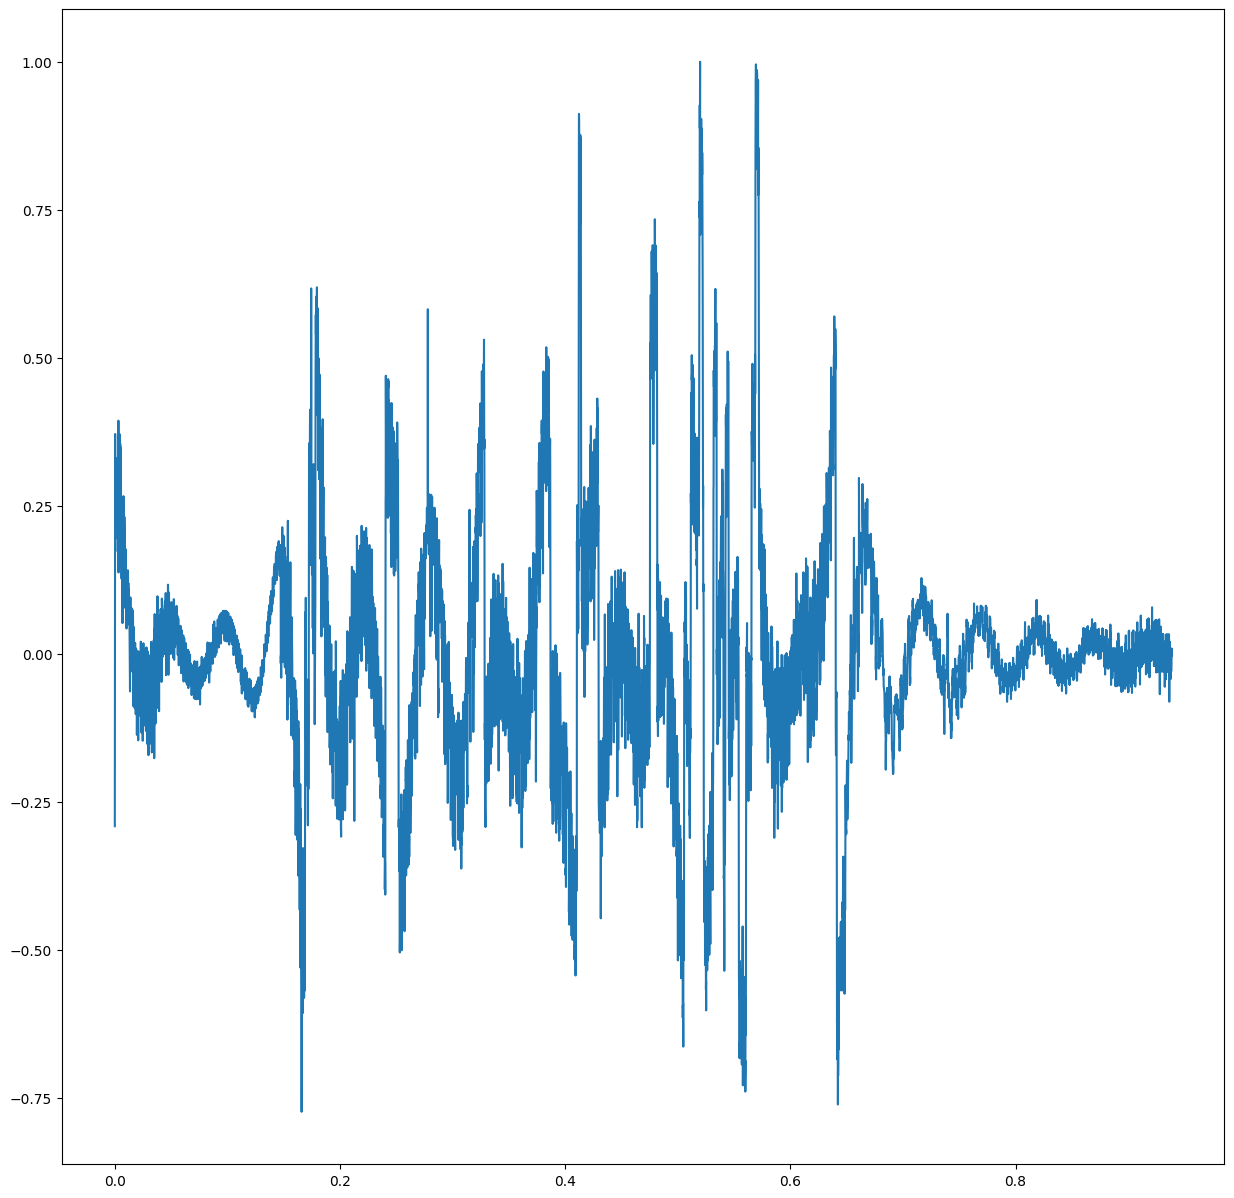

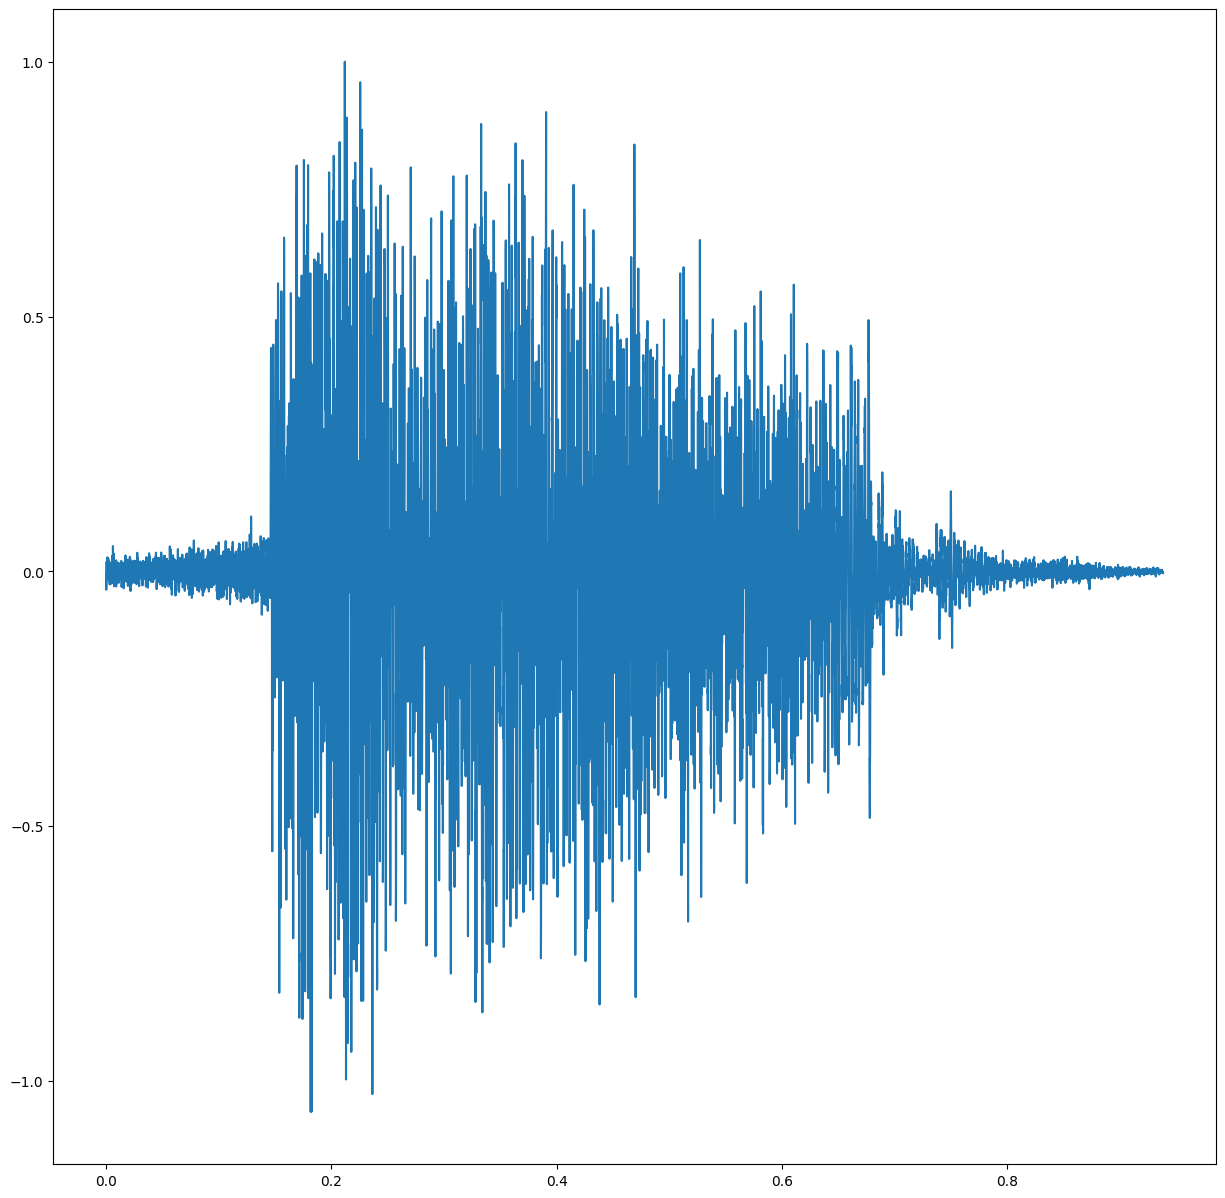

In [212]:
def read_raw_signal_file(dataset_path, class_name, iterfile_name):
    iterfile_path = Path(dataset_path) / class_name / f"{iterfile_name}.mat"
    # mat = loadmat('/home/zhang/zxc/STFT_3DDL/DATASETS/raw_data/DAS1K/CARHORN/carhorn1.mat')
    mat = loadmat(str(iterfile_path))
    phase = mat[iterfile_name][0]
    intensity = mat[iterfile_name][1]
    taxis = np.arange(len(phase))/10000
    plt.figure(figsize=(15, 15))
    plt.plot(taxis, phase)
    plt.figure(figsize=(15, 15))
    plt.plot(taxis, intensity)
    print('test')
    return phase, intensity

# phase, intensity = read_raw_signal_file(dataset_path, class_names[0], iterfile_names[0])
# phase, intensity = read_raw_signal_file(dataset_path, class_names_0, iterfile_names_0)
phase, intensity = read_raw_signal_file(dataset_path, class_names_1, iterfile_names_1)
print(phase.shape)
print(intensity.shape)

(256, 254)


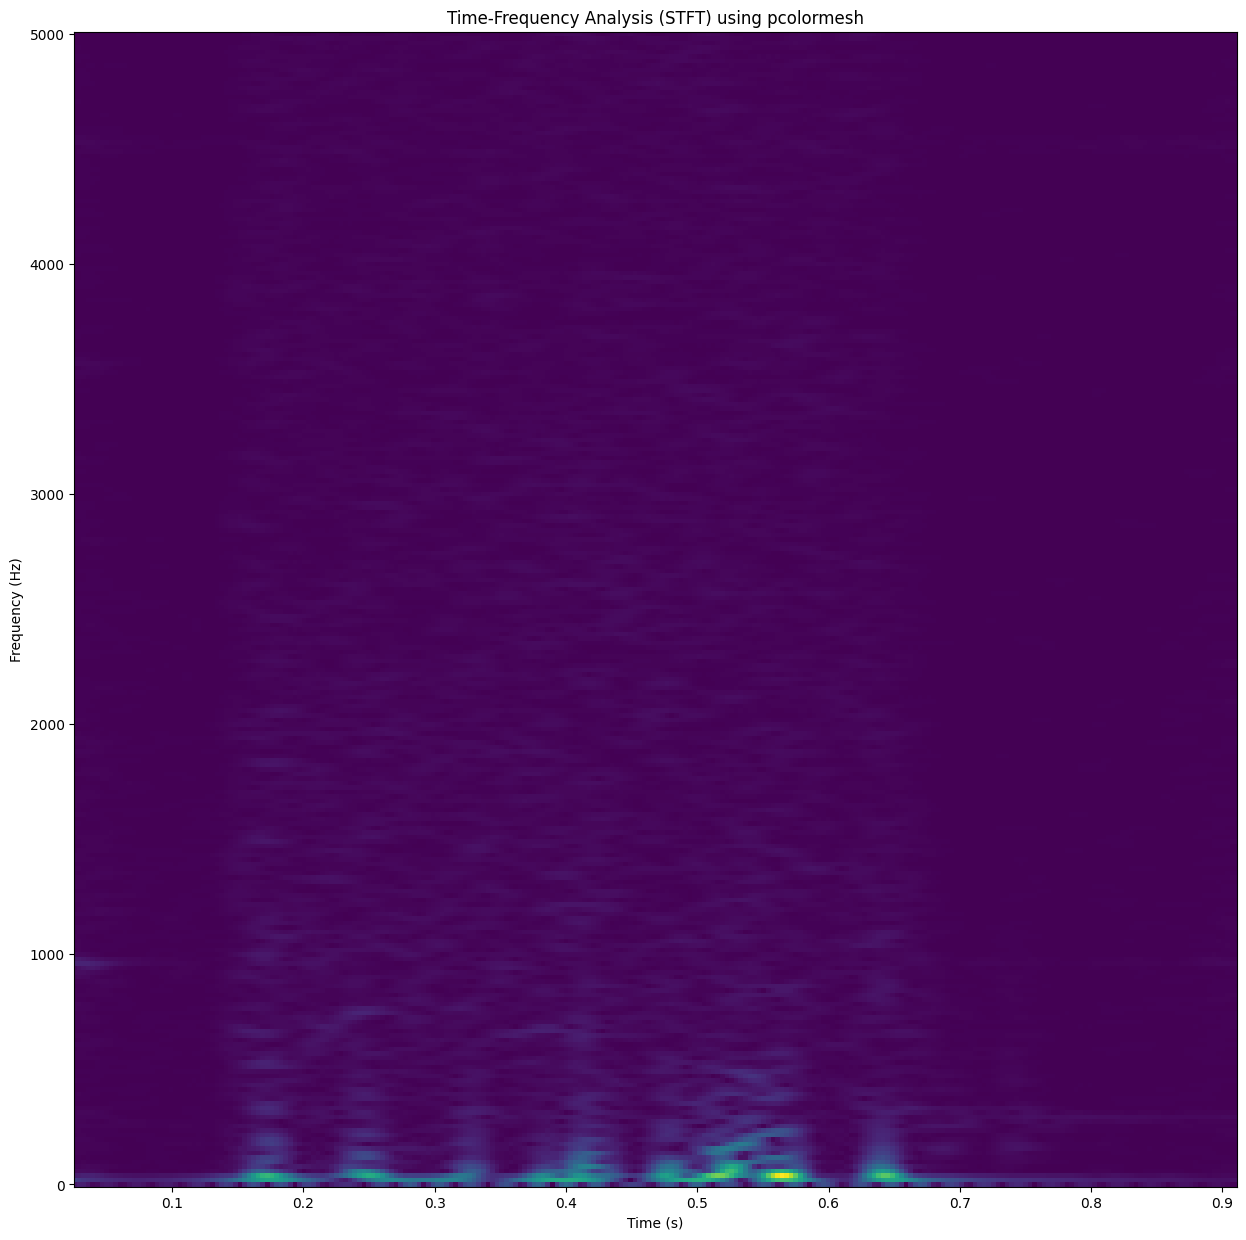

In [217]:
def get_stft_spectrogram(signal_data, fs, window, nperseg, noverlap, padded, boundary):
    """
    signal_data : 信号数据
    fs : 采样频率
    window : 窗口函数名
    nperseg : 窗口大小
    noverlap : 窗口重叠大小
    """
    faxis, taxis, spectrum = signal.stft(signal_data, fs, window=window, nperseg=nperseg, noverlap=noverlap, boundary=boundary, padded=padded)

    # 绘制短时傅里叶变换
    plt.figure(figsize=(15,15))
    plt.pcolormesh(taxis, faxis, np.abs(spectrum))
    # plt.colorbar(label='Magnitude')
    plt.title('Time-Frequency Analysis (STFT) using pcolormesh')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.xlim([taxis[0], taxis[-1]])
    return len(faxis), len(taxis), np.abs(spectrum)

# # 第0张示例图
# # print(get_stft_spectrogram(phase, 10000, 'hamming', 127, 0)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 127, -400)[:2])
# # print(get_stft_spectrogram(phase, 10000, 'hamming', 255, 0)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 255, -9)[:2])
# # print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 0)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 379)[:2])

# print(get_stft_spectrogram(phase, 10000, 'hamming', 255, 168, boundary='zeros')[:2])
print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 475, False,boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 396, True,boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 397, False,boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 397, True,boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 395, False,boundary='zeros')[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 367, boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 510, 365, boundary=None)[:2])
# print(get_stft_spectrogram(phase, 10000, 'hamming', 509, 367, boundary=None)[:2])


# print(get_stft_spectrogram(phase, 10000, 'hamming', 266*4,266*3.75)[:2])
# print(get_stft_spectrogram(intensity, 10000, 'hamming', 266*1,266*0)[:2])
# print(get_stft_spectrogram(intensity, 10000, 'hamming', 266*2,266*1.5)[:2])
# print(get_stft_spectrogram(intensity, 10000, 'hamming', 266*4,266*3.75)[:2])